# Tidy data principles

We all have an intuitive understanding of data, especially in cognitive (and more generally experimental) sciences. However, the way we store information and the structure of our dataset is important when we try to manipulate, model, and visualize data. The principle of tidy data is introduced in an article by [Wickham, 2014](https://www.jstatsoft.org/article/view/v059i10). The article is strongly suggested, but it's content will be replicated below. Most of the examples will be replication of paper content, with code in python. Wickham also provides data and R code in his github [repo](https://github.com/hadley/tidy-data).

## How to define a dataset

Wickham, 2014:

>"A dataset is a collection of values, usually either numbers (if quantitative) or strings (if qualitative). Values are organized in two ways. Every value belongs to a variable and an observation. A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes."



Above definition will make more sense with an example. Let's define a typical dataset that we'd see in a presentation. An imaginary experiment testing the effect of different treatments on three different individuals, thus displaying some values.

In [52]:
# we'll use pandas
import pandas as pd

In [53]:
df_typical = pd.DataFrame({'treatmenta' : [None, 16, 3],
                           'treatmentb': [2, 11, 1]}, ['Ged', 'Tenar', 'Tehanu'])
df_typical

,treatmenta,treatmentb
Ged,NaN,2
Tenar,16.0,11
Tehanu,3.0,1


Here we have 18 values representing three variables and six observations.

The variables:
- **person**, with three possible values (Ged, Tenar, Tehanu)
- **treatment**, with two possible values (a and b)
- **result**, including missing value (NaN) there are six results (NaN, 2, 16, 11, 3, 1)

If data comes from an experiment the design of experiment defines your dataset. If your data is observational, observed variables become important. Here the experiment is a crossed design where every combination of **person** and **treatment** was measured.

Below we'll create a different *view* of the same data. We'll simply [transpose](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) the DataFrame.


In [54]:
df_typical_transposed = df_typical.T
df_typical_transposed

,Ged,Tenar,Tehanu
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Can you tell which representation is better? Actually both are not as tidy as tidy data.

> "Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

Let's put our toy data into tidy-form.



First note the following trick, we need to repeat values, because each person is measured under two different conditions.

In [55]:
2 * ['Ged', 'Tenar', 'Tehanu']

['Ged', 'Tenar', 'Tehanu', 'Ged', 'Tenar', 'Tehanu']

And this is a within group repeated measures design, so treatments are for each person. But, now we need to use a different method called list comprehension.

In [56]:
[x for x in ['a', 'b'] for i in range(3)]

['a', 'a', 'a', 'b', 'b', 'b']

Compare with

In [57]:
3 * ['a', 'b']

['a', 'b', 'a', 'b', 'a', 'b']

We could do the same by using different methods, one of which is using `numpy.repeat` [method](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html).

In [58]:
# import first
import numpy as np #  Convention

In [59]:
np.repeat(['a', 'b'], 2)

array(['a', 'a', 'b', 'b'], dtype='<U1')

Note the change in data type.

In [60]:
type(np.repeat(['a', 'b'], 2))

numpy.ndarray

We can convert back to python list.

In [61]:
list(np.repeat(['a', 'b'], 2))

['a', 'a', 'b', 'b']

In [62]:
# Define variables
var_names = ['person', 'treatment', 'result']

# Define values
person_vals = ['Ged', 'Tenar', 'Tehanu']
treatment_vals = ['a', 'b']
results = [None, 16, 3, 2, 11, 1]

# Get sizes
num_person = len(person_vals)
num_treatment = len(treatment_vals)

# A list of lists for values of variables
values = [num_treatment * person_vals,
          list(np.repeat(treatment_vals, num_person)),
          results]

# Now convert two lists into a python dictionary
data_dict = dict(zip(var_names, values))

# Create a dataframe from dictionary
df_tidy = pd.DataFrame(data_dict)

In [63]:
data_dict

{'person': ['Ged', 'Tenar', 'Tehanu', 'Ged', 'Tenar', 'Tehanu'],
 'treatment': ['a', 'a', 'a', 'b', 'b', 'b'],
 'result': [None, 16, 3, 2, 11, 1]}

In [64]:
df_tidy

,person,treatment,result
0,Ged,a,NaN
1,Tenar,a,16.0
2,Tehanu,a,3.0
3,Ged,b,2.0
4,Tenar,b,11.0
5,Tehanu,b,1.0


Compare the above tidy data with the messy one below.

In [65]:
df_typical

,treatmenta,treatmentb
Ged,NaN,2
Tenar,16.0,11
Tehanu,3.0,1


- Tidy data makes it easier to extract needed variables.
- It provides a standard way of structuring a dataset.
- Tidy data is particularly well suited for vectorized programming because the layout ensures that values of different variables from the same observation are always paired.

There are some additional considerations:
- Missing values are important, they are not zero or any other real value. Make sure you consider the nature of a missing value. Is it because of a sampling error, or is it beacuse it's a structural missing value (i.e. a measurement that is not possible (e.g. number of dogs with wings))
- The order of variables may also be important, and fixed variables are always good to know. Fixed variables are experimentally manipulated, and they're also called dimensions, and in statistics they generally appear as subscripts for random variables. Measured variables are those that we actually measure under different settings created by the fixed variables. Ordering columns from fixed to measured (left to right) and ordering rows with respect to the first variable and breaking ties to subsequent fixed variables is a good practice.

## Messy dataset problems:
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

### 1. Column headers are values, not variable names

Let's read a dataset into a variable by using pandas. This data that we'll read has a `.sav` extension, generally used for saving SPSS data files. If you get an error that complains the optional dependency `pyreadstat` is missing, go ahead and activate your environment in a command window, (e.g. `conda activate pymc_env`) and install [pyreadstat](https://anaconda.org/conda-forge/pyreadstat) from conda-forge (`conda install -c conda-forge pyreadstat`)

In [66]:
# Load data
pew = pd.read_spss("data/pew.sav")

In [67]:
# view first 5 rows of the dataset
pew.head()

,weight,psraid,int_date,lang,type,cregion,state,usr,usr1,form,...,q63,educ,income,regist,regicert,party,partyln,ideo,pvote04a,pvote04b
0,4.512821,10000001.0,50807.0,English,RDD,Northeast,Connecticut,Suburban,Suburban,Form A,...,"Yes, father born outside U.S.","Technical, trade, or vocational school AFTER h...","75 to under $100,000","Yes, registered",Absolutely certain,Republican,NaN,Moderate,Voted,Bush
1,2.102564,10000002.0,50807.0,English,RDD,Northeast,Maine,Rural,Rural,Form B,...,"No, both parents born in U.S.",High school graduate (Grade 12 or GED certific...,"20 to under $30,000","No, not registered",NaN,Republican,NaN,Conservative,Did not vote (includes too young to vote),NaN
2,1.282051,10000003.0,50807.0,English,RDD,Northeast,Maine,Rural,Rural,Form A,...,"No, both parents born in U.S.","College graduate (B.S., B.A., or other 4-year ...","30 to under $40,000","No, not registered",NaN,Independent,Democrat,Conservative,Did not vote (includes too young to vote),NaN
3,1.355323,10000004.0,50807.0,English,RDD,Northeast,Maine,Rural,Rural,Form B,...,"No, both parents born in U.S.","Some college, no 4-year degree (including asso...","Less than $10,000","No, not registered",NaN,Independent,Democrat,Moderate,Did not vote (includes too young to vote),NaN
4,1.589744,10000005.0,50807.0,English,RDD,Northeast,New York,Urban,Urban,Form A,...,"Yes, father born outside U.S.",Post-graduate training or professional schooli...,"50 to under $75,000","Yes, registered",Absolutely certain,Independent,Democrat,Moderate,Voted,Other candidate


In [68]:
pew["q16"].unique()

[' Protestant', ' Nothing in particular', ' Jewish (Judaism)', ' Not Interpretable', ' Liberal faith (VOL)', ..., ' Unification Church (Moonies) (VOL)', ' Greek rite Catholic (VOL)', ' Old Catholic (VOL)', ' Lutheran Orthodox Church/The Catholic Church..., ' Animism (VOL)']
Length: 65
Categories (65, object): [' Agnostic (not sure if there is a God)', ' Animism (VOL)', ' Armenian Catholic (VOL)', ' Asatru (Old Norse form of Paganism) (VOL)', ..., ' Unitarian (Universalist) (VOL)', ' Unity; Unity Church Christ Church Unity (VOL)', ' Wica (Wiccan) (VOL)', ' Zoroastrianism (VOL)']

In [69]:
# number of columns of the dataset
len(pew.columns)

135

The following code block is for illustration purposes. It manipulates the dataset in order to match the example in the paper. You'll be able to understand it later, but for now skip the details.

In [70]:
# following code is converted from R code on author's github page
# to python using chatgpt (with some corrections)

# Select columns of interest
religion = pew[["q16", "reltrad", "income"]].copy(deep=True)

# Convert reltrad to a character and clean it
religion["reltrad"] = religion["reltrad"].astype(str)
religion["reltrad"] = religion["reltrad"].str.replace(" Churches", "")
religion["reltrad"] = religion["reltrad"].str.replace(" Protestant", " Prot")
religion.loc[religion["q16"] == " Atheist (do not believe in God)", "reltrad"] = "Atheist"
religion.loc[religion["q16"] == " Agnostic (not sure if there is a God)", "reltrad"] = "Agnostic"
religion["reltrad"] = religion["reltrad"].str.strip()
religion["reltrad"] = religion["reltrad"].str.replace(r' \(.*?\)', '', regex=True)

# Map income values to the desired format
income_mapping = {
    "Less than $10,000": "<$10k",
    "10 to under $20,000": "$10-20k",
    "20 to under $30,000": "$20-30k",
    "30 to under $40,000": "$30-40k",
    "40 to under $50,000": "$40-50k",
    "50 to under $75,000": "$50-75k",
    "75 to under $100,000": "$75-100k",
    "100 to under $150,000": "$100-150k",
    "$150,000 or more": ">150k",
    "Don't know/Refused (VOL.)": "Don't know/refused"
}

religion["income"] = religion["income"].map(income_mapping)

# Convert income to a factor with custom levels
income_levels = ["<$10k", "$10-20k", "$20-30k", "$30-40k", "$40-50k", "$50-75k",
                 "$75-100k", "$100-150k", ">150k", "Don't know/refused"]
religion["income"] = pd.Categorical(religion["income"], categories=income_levels, ordered=True)

# Count occurrences of combinations of reltrad and income
counts = religion.groupby(["reltrad", "income"], observed=False).size().reset_index(name="count")

# Rename the columns
counts.rename(columns={"reltrad": "religion"}, inplace=True)

# Pivot the table to the desired format
pew_wide = counts.pivot(index="religion", columns="income", values="count")

# Print the first 10 rows and 7 columns of the pivoted table
# print(raw.iloc[:10, :7])

Have a look at the following dataframe. What makes this table messy?

In [71]:
pew_wide.sample(10)

income,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
religion,,,,,,,,,,
Atheist,12,27,37,52,35,70,73,59,74,76
Orthodox,13,17,23,32,32,47,38,42,46,73
Catholic,418,617,732,670,638,1116,949,792,633,1489
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
Other Christian,9,7,11,13,13,14,18,14,12,18
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Mainline Prot,289,495,619,655,651,1107,939,753,634,1328
Muslim,6,7,9,10,9,23,16,8,6,22
Historically Black Prot,228,244,236,238,197,223,131,81,78,339


It is messy because the variables are both at the rows and columns, and headers are values, not variable names. This representation may be useful for efficient *storage* (especially for [completely crossed designs](https://en.wikipedia.org/wiki/Factorial_experiment)), and for efficient computation with matrices.

This dataset (the filtered version, `pew_wide`) has three variables: **religion**, **income**, and **frequency**. The operation for tidying such a dataset is called **melting** or stacking (i.e. turn rows into columns). This operation is also called converting [a wide dataset](https://en.wikipedia.org/wiki/Wide_and_narrow_data) into a long (or tall) dataset. "Melting is parameterized by a list of columns that are already variables, or **colvars** for short".

Below we create a simple dataset with rows as variable names, and use pandas [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function to create long form data. **Note**: Consult library documentations for a better understanding of undelying operations, optional arguments, return values, etc. (e.g. what happens when you don't specify `value_vars`)

In [72]:
# Create a DataFrame
data_wide = {'X': ['A', 'B', 'C'],
             'foo': [1, 2, 3],
             'bar': [4, 5, 6],
             'qwe': [7, 8, 9]}
df_wide = pd.DataFrame(data_wide)
df_wide

,X,foo,bar,qwe
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


Above dataframe actually says that there's another variable with three values: 'foo', 'bar, 'qwe'. So we name this variable as 'Y' below, when we melt the wide-form dataframe given above.

In [73]:
df_long = pd.melt(df_wide, id_vars=['X'], var_name='Y', value_name='cogs516')
df_long

,X,Y,cogs516
0,A,foo,1
1,B,foo,2
2,C,foo,3
3,A,bar,4
4,B,bar,5
5,C,bar,6
6,A,qwe,7
7,B,qwe,8
8,C,qwe,9


And it's also possible to convert a long dataset to wide form using pandas [pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) function.

In [74]:
df_wide_from_long = df_long.pivot(index='X', columns='Y', values='cogs516')
df_wide_from_long

Y,bar,foo,qwe
X,,,
A,4,1,7
B,5,2,8
C,6,3,9


However, note the difference between the two dataframes:

In [75]:
df_wide_from_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bar     3 non-null      int64
 1   foo     3 non-null      int64
 2   qwe     3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [76]:
df_wide_from_long.index

Index(['A', 'B', 'C'], dtype='object', name='X')

In [77]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       3 non-null      object
 1   foo     3 non-null      int64 
 2   bar     3 non-null      int64 
 3   qwe     3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


In [78]:
df_wide.index

RangeIndex(start=0, stop=3, step=1)

The way we create it, `df_wide` had 4 columns with an index generated from 0 to 2, the index of that dataframe was a `RangeIndex` type index object (see above). But since we created `df_wide_from_long` using pivoting operation and we define `index` as an argument (i.e. 'X' with values ['A', 'B', 'C']), resulting pivoted dataframe's index is `Index` type with entries from the variable we input, so there are three columns. We use `reset_index()` to reset 'X' as another column.

In [79]:
# note the difference when you use .reset_index()
df_wide_from_long_reset_index = df_wide_from_long.reset_index()
df_wide_from_long_reset_index

Y,X,bar,foo,qwe
0,A,4,1,7
1,B,5,2,8
2,C,6,3,9


In [80]:
df_wide_from_long_reset_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       3 non-null      object
 1   bar     3 non-null      int64 
 2   foo     3 non-null      int64 
 3   qwe     3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


In [81]:
# following line would give an error, because 'X' would not be present as a column!
# df_long_from_wide_from_long = pd.melt(df_wide_from_long, id_vars=['X'], var_name='Y')

# but we can use the index-reset one:
df_long_from_wide_from_long = pd.melt(df_wide_from_long_reset_index, id_vars=['X'], var_name='YY')
df_long_from_wide_from_long

,X,YY,value
0,A,bar,4
1,B,bar,5
2,C,bar,6
3,A,foo,1
4,B,foo,2
5,C,foo,3
6,A,qwe,7
7,B,qwe,8
8,C,qwe,9


Moral of the story: your operations may not always be reversible! You should always keep an eye on the input and the output, especially when you use methods from a library that you've just started learning.

Now we'll do the same with the Pew dataset. Note that we again reset index to move religion to columns list.

In [82]:
pew_wide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Agnostic to Unaffiliated
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   <$10k               18 non-null     int64
 1   $10-20k             18 non-null     int64
 2   $20-30k             18 non-null     int64
 3   $30-40k             18 non-null     int64
 4   $40-50k             18 non-null     int64
 5   $50-75k             18 non-null     int64
 6   $75-100k            18 non-null     int64
 7   $100-150k           18 non-null     int64
 8   >150k               18 non-null     int64
 9   Don't know/refused  18 non-null     int64
dtypes: int64(10)
memory usage: 1.5+ KB


In [83]:
pew_wide.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [84]:
df_tidy_pew = pd.melt(pew_wide.reset_index(), id_vars=['religion'], var_name='income', value_name="freq")
df_tidy_pew[df_tidy_pew["religion"] == 'Agnostic']

,religion,income,freq
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


There's another example from the paper: Billboard Top 100 song list.
- dataset records when a song first enters the list (date.entered)
- a song has following variables: artist, track (name), date.entered, rank, and week (and genre and date.peaked, which the paper does not consider)
- then the rank in each week is recorded, and they're given as columns here (this reduces duplication of song metadata, like name and artist)
- colvars (columns that are already variables) of this dataframe: year, artist.inverted, track, time, date.entered, date.peaked, genre 

In [85]:
bb_raw = pd.read_csv("data/billboard.csv", encoding="ISO-8859-1")
bb_raw

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
id_vars = ["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"]
bb_long = pd.melt(bb_raw, id_vars=id_vars, var_name="week", value_name="rank")
bb_long

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


76 * 317 = 24092 makes sense, right?

### Multiple variables stored in one column

This issue is illustrated by the tuberculosis (TB) dataset. The problem with this dataset is that variables age (given as ordered categorical ranges) and sex (m/f) are given in a combined form. So even if we try to melt the dataset we're left with a column that contains mixed values for those two variables. We'll process the column headers to extract information.

In [87]:
tb_raw = pd.read_csv("data/tb.csv")
tb_raw.rename(columns={'iso2':'country'}, inplace=True)
tb_raw.drop(columns=['new_sp', 'new_sp_m04', 'new_sp_m514', 'new_sp_f04', 'new_sp_f514'], inplace=True)
tb_raw

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,187.0,833.0,2908.0,2298.0,1056.0,366.0,198.0,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,210.0,837.0,2264.0,1855.0,762.0,295.0,656.0,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,215.0,736.0,2391.0,1939.0,896.0,348.0,199.0,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,138.0,500.0,3693.0,0.0,716.0,292.0,153.0,NaN,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [88]:
tb_raw.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_mu', 'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534',
       'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65',
       'new_sp_fu'],
      dtype='object')

In [89]:
# actual variables and their values
age_ranges = ["0-14", "15-25", "25-34", "35-44", "45-54", "55-64", "65+", "u"]
sexes = ["m", "f"]

# combine them
new_labels = [s + ',' + r for s in sexes for r in age_ranges]

# make a dict for replacing values
old_labels = list(tb_raw.columns)[2:]
lookup = dict(zip(old_labels, new_labels))

lookup

{'new_sp_m014': 'm,0-14',
 'new_sp_m1524': 'm,15-25',
 'new_sp_m2534': 'm,25-34',
 'new_sp_m3544': 'm,35-44',
 'new_sp_m4554': 'm,45-54',
 'new_sp_m5564': 'm,55-64',
 'new_sp_m65': 'm,65+',
 'new_sp_mu': 'm,u',
 'new_sp_f014': 'f,0-14',
 'new_sp_f1524': 'f,15-25',
 'new_sp_f2534': 'f,25-34',
 'new_sp_f3544': 'f,35-44',
 'new_sp_f4554': 'f,45-54',
 'new_sp_f5564': 'f,55-64',
 'new_sp_f65': 'f,65+',
 'new_sp_fu': 'f,u'}

First we melt, as usual.

In [90]:
tb_melted = pd.melt(tb_raw, id_vars=['country', 'year'], var_name='mixed (sex-age)')
tb_melted

,country,year,mixed (sex-age),value
0,AD,1989,new_sp_m014,NaN
1,AD,1990,new_sp_m014,NaN
2,AD,1991,new_sp_m014,NaN
3,AD,1992,new_sp_m014,NaN
4,AD,1993,new_sp_m014,NaN
...,...,...,...,...
92299,ZW,2004,new_sp_fu,NaN
92300,ZW,2005,new_sp_fu,NaN
92301,ZW,2006,new_sp_fu,NaN
92302,ZW,2007,new_sp_fu,NaN


Now we'll use replace method with the lookup table to set new labels for the mixed variable column.

In [91]:
tb_melted['mixed (sex-age)'] = tb_melted['mixed (sex-age)'].replace(lookup)
tb_melted

,country,year,mixed (sex-age),value
0,AD,1989,"m,0-14",NaN
1,AD,1990,"m,0-14",NaN
2,AD,1991,"m,0-14",NaN
3,AD,1992,"m,0-14",NaN
4,AD,1993,"m,0-14",NaN
...,...,...,...,...
92299,ZW,2004,"f,u",NaN
92300,ZW,2005,"f,u",NaN
92301,ZW,2006,"f,u",NaN
92302,ZW,2007,"f,u",NaN


Finally, we'll split.

In [92]:
tb_tidy = tb_melted.copy(deep=True)
tb_tidy[['sex', 'age']] = tb_melted['mixed (sex-age)'].str.split(',', expand=True)
tb_tidy.drop(columns=['mixed (sex-age)'], inplace=True)
tb_tidy

,country,year,value,sex,age
0,AD,1989,NaN,m,0-14
1,AD,1990,NaN,m,0-14
2,AD,1991,NaN,m,0-14
3,AD,1992,NaN,m,0-14
4,AD,1993,NaN,m,0-14
...,...,...,...,...,...
92299,ZW,2004,NaN,f,u
92300,ZW,2005,NaN,f,u
92301,ZW,2006,NaN,f,u
92302,ZW,2007,NaN,f,u


### Variables are stored in both rows and columns.

For this part Wickham uses a weather dataset, and consider this as the most complicated form of messy data. If you have a look at the raw data, even reading it is not easy in its current form, there are I's or S's for separating values. I had to use an editor (Sublime Text) to add commas in between and save as `.csv`. There are also interesting values such as -9999 which looks like a missing value actually.

In [93]:
mx_raw = pd.read_csv("data/weather.txt", header=None)
mx_raw

,0
0,MX000017004195504TMAX 310 I 310 I 310 I ...
1,MX000017004195504TMIN 150 I 150 I 160 I ...
2,MX000017004195504PRCP 0 I 0 I 0 I ...
3,MX000017004195505TMAX 310 I 310 I 310 I ...
4,MX000017004195505TMIN 200 I 160 I 160 I ...
...,...
1709,MX000017004201103TMIN-9999 -9999 -9999 -...
1710,MX000017004201103PRCP 0 S-9999 0 S ...
1711,MX000017004201104TMAX-9999 350 S-9999 -...
1712,MX000017004201104TMIN-9999 168 S-9999 -...


In [94]:
mx_raw_csv = pd.read_csv("data/weather.csv", header=None)
mx_raw_csv

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,MX000017004195504TMAX,310,310,310,320,330,320,320,330,330,...,330,330,330,330,330,330,340,330,320,-9999
1,MX000017004195504TMIN,150,150,160,150,160,160,160,160,160,...,170,170,170,180,190,190,170,180,160,-9999
2,MX000017004195504PRCP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,-9999
3,MX000017004195505TMAX,310,310,310,300,300,300,310,310,310,...,330,340,350,330,310,310,320,310,300,290
4,MX000017004195505TMIN,200,160,160,150,150,150,160,160,170,...,170,190,190,190,180,160,150,170,150,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,MX000017004201103TMIN,-9999,-9999,-9999,-9999,148,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,162,-9999,-9999,-9999,-9999,170
1710,MX000017004201103PRCP,0,-9999,0,0,0,-9999,0,0,0,...,0,-9999,0,-9999,0,-9999,-9999,0,-9999,0
1711,MX000017004201104TMAX,-9999,350,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1712,MX000017004201104TMIN,-9999,168,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [95]:
mx_raw_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1714 non-null   object
 1   1       1714 non-null   object
 2   2       1714 non-null   object
 3   3       1714 non-null   int64 
 4   4       1714 non-null   object
 5   5       1714 non-null   int64 
 6   6       1714 non-null   int64 
 7   7       1714 non-null   object
 8   8       1714 non-null   object
 9   9       1714 non-null   object
 10  10      1714 non-null   object
 11  11      1714 non-null   int64 
 12  12      1714 non-null   int64 
 13  13      1714 non-null   int64 
 14  14      1714 non-null   int64 
 15  15      1714 non-null   int64 
 16  16      1714 non-null   int64 
 17  17      1714 non-null   object
 18  18      1714 non-null   object
 19  19      1714 non-null   int64 
 20  20      1714 non-null   object
 21  21      1714 non-null   object
 22  22      1714 non-null   

In [96]:
mx_raw_csv.iloc[:,0][0]

'MX000017004195504TMAX '

Let's use regular expressions to extract info, and define a function to apply to each element of a column. For explanations on regular expression syntax have a look at the [docs](https://docs.python.org/3/library/re.html).

In [97]:
import re
def map_fn(i):
    L = [x for x in re.split(r'(^[A-Za-z]{2})\d{4}(\d{5})(\d{4})(\d*)([A-Za-z]*)', i.strip()) if x not in ['', '0000']]
    return [L[0]+L[1]] + L[2:]

map_fn(mx_raw_csv.iloc[:,0][0])

['MX17004', '1955', '04', 'TMAX']

In [98]:
mx_raw_csv['sepvars'] = mx_raw_csv.iloc[:,0].map(map_fn)
mx_raw_csv['sepvars']

0       [MX17004, 1955, 04, TMAX]
1       [MX17004, 1955, 04, TMIN]
2       [MX17004, 1955, 04, PRCP]
3       [MX17004, 1955, 05, TMAX]
4       [MX17004, 1955, 05, TMIN]
                  ...            
1709    [MX17004, 2011, 03, TMIN]
1710    [MX17004, 2011, 03, PRCP]
1711    [MX17004, 2011, 04, TMAX]
1712    [MX17004, 2011, 04, TMIN]
1713    [MX17004, 2011, 04, PRCP]
Name: sepvars, Length: 1714, dtype: object

In [99]:
# now we can separate list cells into different columns,
# and concatenate with the remaining part
mx_split = pd.concat([pd.DataFrame(mx_raw_csv['sepvars'].to_list(),
                        columns=['id', 'year', 'month', 'element']),
           mx_raw_csv.iloc[:,1:-1]], axis=1)
mx_split

,id,year,month,element,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,MX17004,1955,04,TMAX,310,310,310,320,330,320,...,330,330,330,330,330,330,340,330,320,-9999
1,MX17004,1955,04,TMIN,150,150,160,150,160,160,...,170,170,170,180,190,190,170,180,160,-9999
2,MX17004,1955,04,PRCP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,-9999
3,MX17004,1955,05,TMAX,310,310,310,300,300,300,...,330,340,350,330,310,310,320,310,300,290
4,MX17004,1955,05,TMIN,200,160,160,150,150,150,...,170,190,190,190,180,160,150,170,150,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,MX17004,2011,03,TMIN,-9999,-9999,-9999,-9999,148,-9999,...,-9999,-9999,-9999,-9999,162,-9999,-9999,-9999,-9999,170
1710,MX17004,2011,03,PRCP,0,-9999,0,0,0,-9999,...,0,-9999,0,-9999,0,-9999,-9999,0,-9999,0
1711,MX17004,2011,04,TMAX,-9999,350,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1712,MX17004,2011,04,TMIN,-9999,168,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


Still, dataset is messy:
- column headers (1 to 31) are days, i.e. they're values, not variable names
- year-month-day can be combined to form `date`
- python has a `datetime` module

Let's first melt days.

In [100]:
mx_split_melt = pd.melt(mx_split, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='value')
mx_split_melt

,id,year,month,element,day,value
0,MX17004,1955,04,TMAX,1,310
1,MX17004,1955,04,TMIN,1,150
2,MX17004,1955,04,PRCP,1,0
3,MX17004,1955,05,TMAX,1,310
4,MX17004,1955,05,TMIN,1,200
...,...,...,...,...,...,...
53129,MX17004,2011,03,TMIN,31,170
53130,MX17004,2011,03,PRCP,31,0
53131,MX17004,2011,04,TMAX,31,-9999
53132,MX17004,2011,04,TMIN,31,-9999


Now combine to form `date`.

In [101]:
from datetime import datetime, timedelta

def map_datetime(row):
    if row[['year','month','day']].isna().any(): #  if any of the elements in a row is None
        return None
    else:
        try:  # sometimes there are non-existent date combinations!
            return datetime(int(row['year']),
                            int(row['month']),
                            int(row['day']))
        except ValueError as e:
            return None

# note that pandas converts some None objects to NaT (not a time) objects
# small things like these may even change your analysis results
mx_split_melt['date'] = mx_split_melt.apply(map_datetime, axis=1)
mx_split_melt

,id,year,month,element,day,value,date
0,MX17004,1955,04,TMAX,1,310,1955-04-01
1,MX17004,1955,04,TMIN,1,150,1955-04-01
2,MX17004,1955,04,PRCP,1,0,1955-04-01
3,MX17004,1955,05,TMAX,1,310,1955-05-01
4,MX17004,1955,05,TMIN,1,200,1955-05-01
...,...,...,...,...,...,...,...
53129,MX17004,2011,03,TMIN,31,170,2011-03-31
53130,MX17004,2011,03,PRCP,31,0,2011-03-31
53131,MX17004,2011,04,TMAX,31,-9999,NaT
53132,MX17004,2011,04,TMIN,31,-9999,NaT


In [102]:
mx_split_melt['id'].unique()

array(['MX17004'], dtype=object)

Let just get rid of NaN values. Also the `id` variable is just a single value, we can remove the whole column.

In [103]:
# delete rows with any NaN values,
# and those that we combine
mx_non_nan = mx_split_melt.dropna(axis=0)[['date','element','value']]
mx_non_nan.sort_values(by='date').head(15)

,date,element,value
0,1955-04-01,TMAX,310
1,1955-04-01,TMIN,150
2,1955-04-01,PRCP,0
1716,1955-04-02,PRCP,0
1715,1955-04-02,TMIN,150
1714,1955-04-02,TMAX,310
3428,1955-04-03,TMAX,310
3429,1955-04-03,TMIN,160
3430,1955-04-03,PRCP,0
5144,1955-04-04,PRCP,0


We also need to pivot (also called cast or unstack) for different variables (observation types): *tmax*, *tmin*, and *prcp*. When pivoting we need to check if our fixed variables are duplicated. In this dataset it seems unlikly, because it is not logical for those variables to repeat in a given date (i.e. max temp is a single value in a day). But let's check it for demonstration.

In [104]:
# no duplicates
print(mx_non_nan.duplicated(subset=['element','date']).sum())

# so use pivot (if there were duplicates we'd use pivot_table)
mx_tidy = pd.pivot(mx_non_nan, index='date', columns=['element'], values='value').reset_index()
mx_tidy = mx_tidy.dropna()
mx_tidy

0


element,date,PRCP,TMAX,TMIN
0,1955-04-01,0,310,150
1,1955-04-02,0,310,150
2,1955-04-03,0,310,160
3,1955-04-04,0,320,150
4,1955-04-05,0,330,160
...,...,...,...,...
17870,2011-04-26,-9999,-9999,-9999
17871,2011-04-27,-9999,-9999,-9999
17872,2011-04-28,-9999,-9999,-9999
17873,2011-04-29,-9999,-9999,-9999


It'd be nice to have a simple plot. But first, let's have a look at [data types](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html).

In [105]:
mx_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17112 entries, 0 to 17874
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17112 non-null  datetime64[ns]
 1   PRCP    17112 non-null  object        
 2   TMAX    17112 non-null  object        
 3   TMIN    17112 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 668.4+ KB


In [106]:
# note the following object, it's a string
type(mx_tidy['PRCP'][0])

str

In [107]:
# but this one's an integer
type(mx_tidy['PRCP'][2])

int

In [108]:
int(mx_tidy['PRCP'][0])

0

Pandas provides a function to convert argument to a numeric type, see [docs](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) for info.

In [109]:
# coerce replaces items with NaN if not convertible
mx_tidy['PRCP'] = pd.to_numeric(mx_tidy['PRCP'], errors='coerce').astype(float)
# check if the number is too much
mx_tidy['PRCP'].isna().sum()

12

In [110]:
mx_tidy['PRCP'] < 0

0        False
1        False
2        False
3        False
4        False
         ...  
17870     True
17871     True
17872     True
17873     True
17874     True
Name: PRCP, Length: 17112, dtype: bool

In [111]:
import seaborn as sns
import warnings
# Filter out all warnings
warnings.filterwarnings("ignore")

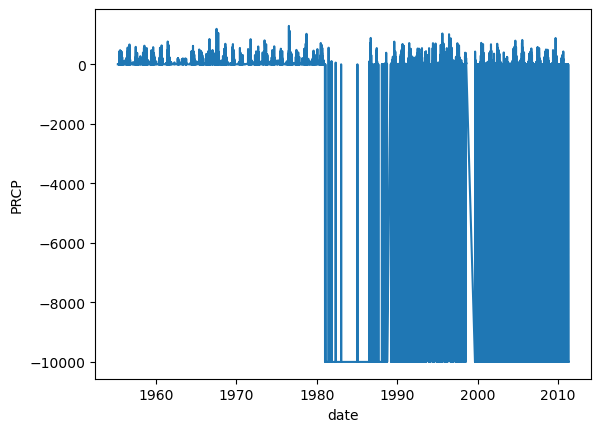

In [112]:
sns.lineplot(x='date', y='PRCP', data=mx_tidy);

Looks like the -9999 values are not real. We'll replace them with `NaN`s.

In [113]:
# Where cond is True, keep the original value.
mx_tidy['PRCP'] = mx_tidy['PRCP'].where(mx_tidy['PRCP'] >= 0, np.nan)

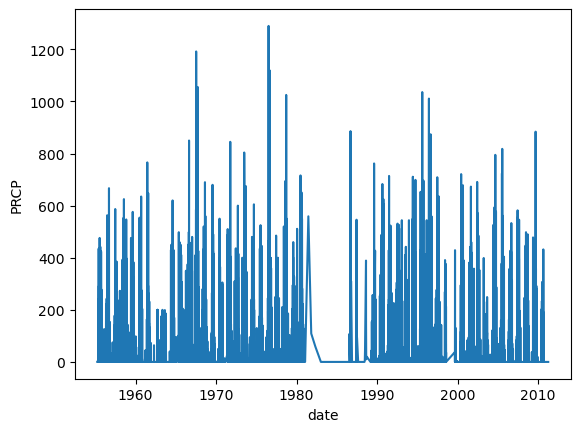

In [114]:
sns.lineplot(x='date', y='PRCP', data=mx_tidy);

In [115]:
for col in ['TMIN', 'TMAX']:
    mx_tidy[col] = pd.to_numeric(mx_tidy[col], errors='coerce').astype(float)
    mx_tidy[col] = mx_tidy[col].where(mx_tidy[col] >= 0, np.nan)

In [116]:
mx_tidy_melted = pd.melt(mx_tidy, id_vars='date', value_name='val')
mx_tidy_melted

,date,element,val
0,1955-04-01,PRCP,0.0
1,1955-04-02,PRCP,0.0
2,1955-04-03,PRCP,0.0
3,1955-04-04,PRCP,0.0
4,1955-04-05,PRCP,0.0
...,...,...,...
51331,2011-04-26,TMIN,NaN
51332,2011-04-27,TMIN,NaN
51333,2011-04-28,TMIN,NaN
51334,2011-04-29,TMIN,NaN


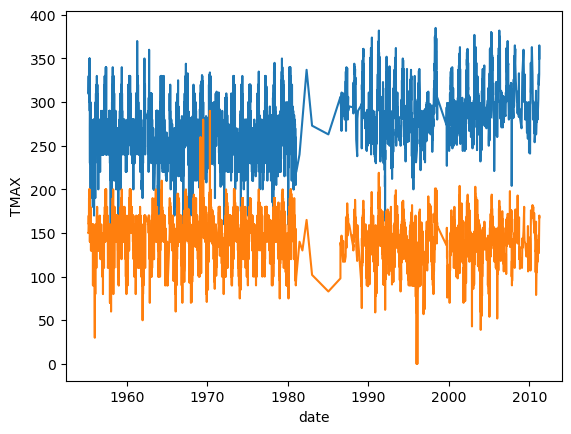

In [117]:
sns.lineplot(x='date', y='TMAX', data=mx_tidy);
sns.lineplot(x='date', y='TMIN', data=mx_tidy);

#### Multiple types of observational units are stored in the same table.
> "Datasets often involve values collected at multiple levels, on different types of observational units. During tidying, each type of observational unit should be stored in its own table. This is closely related to the idea of database normalization, where each fact is expressed in only one place. If this is not done, it is possible for inconsistencies to occur."

In this section we'll work again on Billboard data, which actually includes two *types* of *observational units*:
- the song
- song's rank in each week

Note that because of this song variables are duplicated (artist, time) as below. We'll separate this dateset into two: song dataset (artist, song name, time), and ranking dataset (rank of the song in each week).

> "You could also imagine a week dataset which would record background information about the week, maybe the total number of songs sold or similar demographic information."

Note that [database normalization](https://en.wikipedia.org/wiki/Database_normalization) is not the same with [normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) as in statistics.

Wickham, 2014 comments:
> "Normalization is useful for tidying and eliminating inconsistencies. However, there are few data analysis tools that work directly with relational data, so analysis usually also requires denormalization or merging the datasets back into one table."

In [118]:
# let's drop NaN ranks
bb_long_dropna = bb_long.dropna(axis=0)
bb_long_dropna = bb_long_dropna.sort_values(by=['artist.inverted'])
bb_long_dropna.head(20)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x5th.week,87.0
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x6th.week,94.0
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x1st.week,87.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x4th.week,77.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x3rd.week,72.0
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x7th.week,99.0
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,x2nd.week,82.0
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,x2nd.week,87.0
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,x1st.week,91.0
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,x3rd.week,92.0


In [119]:
# let's also extract digits from string values
def map_week_digit(s):
    return int(re.findall(r'\d+', s)[0]) - 1 # -1 is for indexing from 0

bb_long_dropna['week'] = bb_long_dropna['week'].map(map_week_digit)
bb_long_dropna

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,4,87.0
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,5,94.0
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,0,87.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,3,77.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,2,72.0
...,...,...,...,...,...,...,...,...,...
2234,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,7,16.0
1917,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,6,18.0
11427,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,36,38.0
3502,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,11,6.0


In [120]:
bb_long_dropna[bb_long_dropna['track'] == 'Baby Don\'t Cry (Keep Ya Head Up II)'].sort_values(by='week')

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,0,87.0
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,1,82.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,2,72.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,3,77.0
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,4,87.0
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,5,94.0
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,6,99.0


In [121]:
bb_long_dropna[bb_long_dropna['track'] == 'The Hardest Part Of Breaking Up (Is Getting Back Your Stuff)'].sort_values(by='week')

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,0,91.0
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,1,87.0
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,2,92.0


In [122]:
bb_long_dropna[bb_long_dropna['track'] == 'Kryptonite'].sort_values(by='week').head(6)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
24,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,0,81.0
341,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,1,70.0
658,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,2,68.0
975,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,3,67.0
1292,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,4,66.0
1609,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,5,57.0


We can also use week info to create a date column by adding weeks to 'date.entered' column. First, we need to convert string dates to `datetime` objects, and add `timedelta` to it using 'week' column.

In [123]:
def map_str_dt(row): # get the row (by input arg axis=1 to .apply)
    s = row['date.entered']
    split_list = [int(i) for i in s.split('-')] # split string, convert to integer
    return datetime(*split_list) + timedelta(weeks=row['week']) # use * at the beginning of a list object to make it multi-argument input

bb_long_dropna['date'] = bb_long_dropna.apply(map_str_dt, axis=1)
bb_long_dropna[bb_long_dropna['track'] == 'Kryptonite'].sort_values(by='week').head(6)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
24,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,0,81.0,2000-04-08
341,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,1,70.0,2000-04-15
658,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,2,68.0,2000-04-22
975,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,3,67.0,2000-04-29
1292,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,4,66.0,2000-05-06
1609,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,5,57.0,2000-05-13


Now we need to keep the relation between two dataframes. Again, we'll spilt into two datasets: song dataset (artist, song name, time), and ranking dataset (rank of the song in each week). These two dataframes will be related to each other by song id. So, we need to give an id based on 'track'. We can do this by pandas [factorize](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html).

In [124]:
bb_long_dropna['ID'] = pd.factorize(bb_long_dropna['track'])[0]
# different songs, different IDs
bb_long_dropna.sample(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date,ID
3212,2000,Blink-182,All The Small Things,2:52,Rock,1999-12-04,2000-02-19,10,7.0,2000-02-12,38
1103,2000,"Strait, George",Go On,3:48,Country,2000-08-26,2000-10-28,3,56.0,2000-09-16,278
25,2000,Sisqo,Thong Song,4:05,Rock,2000-01-29,2000-05-20,0,74.0,2000-01-29,262
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,2000-09-09,0,91.0,2000-09-02,1
2997,2000,No Doubt,Simple Kind Of Life,4:11,Rock,2000-07-01,2000-07-22,9,85.0,2000-09-02,226


In [125]:
# same song same ID
bb_long_dropna[bb_long_dropna['track'] == 'Kryptonite'].head(6)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date,ID
10802,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,34,4.0,2000-12-02,2
6047,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,19,14.0,2000-08-19,2
4462,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,14,38.0,2000-07-15,2
1926,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,6,54.0,2000-05-20,2
11119,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,35,5.0,2000-12-09,2
10485,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,33,3.0,2000-11-25,2


In [126]:
song_df = bb_long_dropna[['ID', 'artist.inverted', 'track', 'time']].drop_duplicates()
song_df.head(15)

,ID,artist.inverted,track,time
1514,0,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
604,1,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
10802,2,3 Doors Down,Kryptonite,3:53
1144,3,3 Doors Down,Loser,4:24
3873,4,504 Boyz,Wobble Wobble,3:35
5411,5,98¡,Give Me Just One Night (Una Noche),3:24
938,6,A*Teens,Dancing Queen,3:44
7939,7,Aaliyah,Try Again,4:03
1086,8,Aaliyah,I Don't Wanna,4:15
4638,9,"Adams, Yolanda",Open My Heart,5:30


In [127]:
ranking_df = bb_long_dropna[['ID', 'date', 'rank']]
ranking_df.sort_values(by='ID').head(15)

,ID,date,rank
1514,0,2000-03-25,87.0
1831,0,2000-04-01,94.0
246,0,2000-02-26,87.0
1197,0,2000-03-18,77.0
880,0,2000-03-11,72.0
2148,0,2000-04-08,99.0
563,0,2000-03-04,82.0
604,1,2000-09-09,87.0
287,1,2000-09-02,91.0
921,1,2000-09-16,92.0


### A single observational unit is stored in multiple tables.

The observational unit is generally split up by another variable. If there's a consistency in how our unit of interest is split up, then there's an algorithm for tidying it:
1. Read files into a list of tables.
2. For each table add a column that records the original filename.
3. Combine all into single table.

In [128]:
# following code is used to separate an already combined dataset into datasets
# of baby names from different states

# baby_names_states = pd.read_csv("data/baby-names-by-state.csv")
# for n, g in baby_names_states.groupby('state', group_keys=False):
#     g.drop('state', axis=1).to_csv('./data/baby-names/'+n+'.csv', index=False)

In [129]:
import glob # for finding pathnames matching a specified pattern
table_list = glob.glob("./data/baby-names/*.csv")
print(len(table_list))
print(table_list[13])

50
./data/baby-names/VT.csv


In [130]:
# use comprehensions for reading multiple csv files into dfs
# they are faster
df_list = [pd.read_csv(f) for f in table_list]
df_list[13].head() # for VT

,year,name,number,sex
0,1960,Michael,249.0,boy
1,1960,David,198.0,boy
2,1960,James,158.0,boy
3,1960,John,151.0,boy
4,1960,Robert,150.0,boy


In [131]:
# we need to keep state info before combining
for id, table in enumerate(table_list):
    state_name = re.findall(r"([A-Z]+?)\.", table)[0]
    df_list[id]['state'] = state_name

In [132]:
df_list[13]

,year,name,number,sex,state
0,1960,Michael,249.0,boy,VT
1,1960,David,198.0,boy,VT
2,1960,James,158.0,boy,VT
3,1960,John,151.0,boy,VT
4,1960,Robert,150.0,boy,VT
...,...,...,...,...,...
10667,2008,Quinn,5.0,girl,VT
10668,2008,Raegan,5.0,girl,VT
10669,2008,Rowan,5.0,girl,VT
10670,2008,Skylar,5.0,girl,VT


In [133]:
pd.concat(df_list)

,year,name,number,sex,state
0,1960,David,1975.0,boy,MN
1,1960,Mark,1754.0,boy,MN
2,1960,Michael,1668.0,boy,MN
3,1960,John,1523.0,boy,MN
4,1960,James,1460.0,boy,MN
...,...,...,...,...,...
10401,2008,Kayla,10.0,girl,MT
10402,2008,Leah,10.0,girl,MT
10403,2008,Mary,10.0,girl,MT
10404,2008,Maya,10.0,girl,MT


This was relatively easy.

> "A more complicated situation occurs when the dataset structure changes over time. For example, the datasets may contain different variables, the same variables with different names, different file formats, or different conventions for missing values. This may require you to tidy each file individually (or, if you are lucky, in small groups) and then combine them once tidied."

There's no limit to how messy a dataset can be. However, even if tidying it takes time, once you obtain a tidy dataset you can easily manipulate, visualize, and model the data.

## Tidy Tools

### 1. Manipulation
- Filter: subsetting or removing observations based on some condition.
- Transform: adding or modifying variables.
- Aggregate: collapsing multiple values into a single value
- Sort: changing the order of observations

Some of these operations were already used when we tidied dataset in the previous section. Some of the functions used for these operations in `pandas` are:
- A common way to filter data is using [boolean indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing). Note that the `filter` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html) is for subsetting accorging to specified index labels. Other methods that can help for filtering are: `map`, `isin`, `any`, `all`, `where`, `mask`, `query`, and probably more. Make sure you consult the documentation when you use a built-in method.
- We mostly used `apply` method to apply a function along an axis of a dataframe to transform variables. Again, there are other methods such as `map` and `transform`.
- Aggregation usually involves splitting and applying before combining. Pandas provides such a method, and it's called [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), and the process is called [split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html). Calling `groupby` on a `pandas.DataFrame` or `pandas.Series` returns `GroupBy` instances `DataFrameGroupBy` or `SeriesGroupBy`, and these instances have their own methods, and for aggregation [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html) is provided.
- Sorting is possible with `sort_values`, and some methods accept `sort` argument.

### 2. Visualization

Libraries written in python generally use [`matplotlib`](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure) for plotting. Dataframes have [`plot`](https://pandas.pydata.org/docs/user_guide/visualization.html) methods, as well as functions for customizing [table visualization](https://pandas.pydata.org/docs/user_guide/style.html). Two additional libraries we'll be using are [seaborn](https://seaborn.pydata.org/) and [arviz](https://python.arviz.org/en/stable/). The former provides high-level functions as an interface between tidy data and the intended type of plot, and the latter is specially designed for "exploratory analysis of Bayesian models".

### 3. Modeling

Tidying data is a good way to prepare for modeling. Different variables and their types (predictors, outcomes) are already structured, and keeping a tidy data structure becomes even more important when probabilistic inference related [dimensions](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/dimensionality.html#dimensionality) (draw, chain) are introduced. We'll use `pymc` for Bayesian modeling, which integrates nicely with pandas, xarray and tidy data principles.

## Case Study

Wickham (2014) also provides a case study which deals with mortality data to find out unusual temporal patterns of death within a day. Here we follow his case by using python.

The paper follows from a `.rds` file, to open it we'll use a  library called [pyreadr](https://github.com/ofajardo/pyreadr). To install it we need to open up a terminal window (or anaconda prompt), activate the environment we're going to use, and then install with `pip install pyreadr` command.

In [134]:
import pyreadr

read_rds = pyreadr.read_r("data/deaths.rds")
type(read_rds[None])

pandas.core.frame.DataFrame

In [135]:
# we've got an ordered dictionary
# it seems to have one object with key None
print(read_rds.keys())

# get dataframe
df_death = read_rds[None]
df_death.info()

odict_keys([None])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539530 entries, 0 to 539529
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   yod     539530 non-null  int32 
 1   mod     539530 non-null  int32 
 2   dod     539530 non-null  int32 
 3   hod     513273 non-null  object
 4   cod     539530 non-null  object
dtypes: int32(3), object(2)
memory usage: 14.4+ MB


For this case study we're provided with:
- `yod`, `mod`, `dod`, `hod`: year, month, day, hour of death
- `cod`: cause of death

Paper shows an overall pattern of a day regardless of cause of death. To plot that we need to aggregate for each `hod` and count number of group members. To do so we'll use `groupby`.

In [136]:
# how many different hours in a day
print(len(df_death['hod'].unique()))

24


Let's drop `NaN`s first.

In [137]:
df_nonan = df_death.dropna(axis=0)
pc = (len(df_death) - len(df_nonan))/len(df_death)
print(f'{pc:.1}% of {len(df_death)} samples were removed')

0.05% of 539530 samples were removed


In [138]:
# how many different causes of death
print(len(df_nonan['cod'].unique()))

1194


In [139]:
# how many different years of death
print(len(df_nonan['yod'].unique()))

61


There are many other possible ways to do this, but we'll use a [built-in aggregation method](https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods), `count`.

In [140]:
# now we can use agg method
daily_overall = df_nonan.groupby('hod').agg(death_count = ('hod','count')).reset_index()
daily_overall

,hod,death_count
0,1,20430
1,2,18962
2,3,19729
3,4,20239
4,5,22126
5,6,23787
6,7,21822
7,8,21915
8,9,22401
9,10,24321


We can use pandas `plot` wrapper. It uses matplotlib as its default backend. See [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

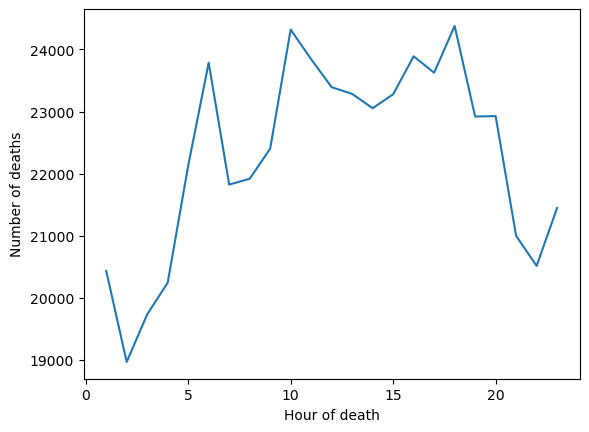

In [141]:
daily_overall.plot(x='hod', y='death_count', xlabel='Hour of death', ylabel='Number of deaths', legend=False);

Count the number of deaths for each cause.

In [142]:
cause_freqs = df_nonan.groupby('cod').agg(cause_freq = ('cod', 'count')).reset_index()
sorted_casue_freqs = cause_freqs.sort_values('cause_freq', ascending=False)
sorted_casue_freqs.head()

,cod,cause_freq
417,I21,46794
260,E11,42421
262,E14,27330
495,J44,16043
566,K70,12860


Just to demonstrate another counting method:

In [143]:
df_nonan['cod'].value_counts() # will do the same..

cod
I21    46794
E11    42421
E14    27330
J44    16043
K70    12860
       ...  
R20        1
X62        1
Q52        1
G56        1
Q55        1
Name: count, Length: 1194, dtype: int64

We don't know what those code names refer to, so read them too.

In [144]:
df_cause_ids = pd.read_csv("data/icd-main.csv")
# there's a code but no explanation, so add this line to avoid errors
df_cause_ids = pd.concat([df_cause_ids, pd.DataFrame({'code': ['A15'], 'disease':['unknown']})], ignore_index=True)
df_cause_ids.head()

,code,disease
0,A00,Cholera
1,A01,Typhoid and paratyphoid fevers
2,A02,Other salmonella infections
3,A03,Shigellosis
4,A04,Other bacterial intestinal infections


What are top 5 causes of death regardless of hour of the day?

In [145]:
for rank, cause in enumerate(sorted_casue_freqs['cod'].iloc[0:5]):
    print(rank+1, '-', df_cause_ids[df_cause_ids['code'] == cause]['disease'].values[0])

1 - Acute myocardial infarction
2 - Non-insulin-dependent diabetes mellitus  
3 - Unspecified diabetes mellitus  
4 - Other chronic obstructive pulmonary disease
5 - Alcoholic liver disease


How cause-frequencies are distributed?

In [146]:
cause_freqs.describe()

,cause_freq
count,1194.000000
mean,429.876884
std,2304.245722
min,1.000000
25%,4.000000
50%,21.500000
75%,138.750000
max,46794.000000


Can we have a look at the distribution?

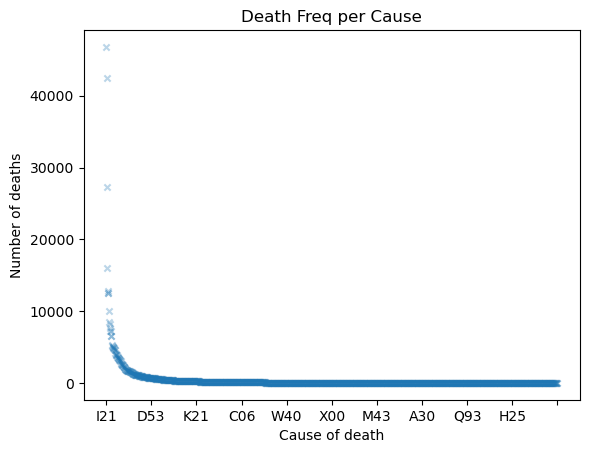

In [147]:
from math import floor

ax = sorted_casue_freqs.plot(x='cod', y='cause_freq', 
                        kind='scatter', title='Death Freq per Cause',
                        marker='x', alpha=0.3,
                        xlabel='Cause of death', ylabel='Number of deaths', legend=False)
tick_position = np.linspace(0, len(cause_freqs), floor(len(cause_freqs)/100))
ax.set_xticks(tick_position);

What are the causes with 10 deaths overall?

In [148]:
for rank, cause in enumerate(sorted_casue_freqs[sorted_casue_freqs['cause_freq']==10]['cod']):
    print(cause, '-', df_cause_ids[df_cause_ids['code'] == cause]['disease'].values[0])

W86 - Exposure to other specified electric current
X58 - Exposure to other specified factors
G21 - Secondary parkinsonism
I30 - Acute pericarditis
G25 - Other extrapyramidal and movement disorders
X36 - Victim of avalanche, landslide, and other earth movements
V22 - Motorcycle rider injured in collision with two- or three-wheeled motor vehicle  
B39 - Histoplasmosis
B38 - Coccidioidomycosis
A37 - Whooping cough
J12 - Viral pneumonia, not elsewhere classified
L40 - Psoriasis
R07 - Pain in throat and chest
O02 - Other abnormal products of conception
R19 - Other symptoms and signs involving the digestive system and abdomen
B33 - Other viral diseases, not elsewhere classified
D12 - Benign neoplasm of colon, rectum, anus, and anal canal
B44 - Aspergillosis
X40 - Accidental poisoning by and exposure to nonopioid analgesics, antipyretics, and antirheumatics


Considering our aim of finding causes of death with unusual temporal patterns within a day, and considering the difference of several orders of magnitude causes of death, it would be better if we use proportion of deaths in each hour, for each cause.

In [149]:
# let's first add a column to keep overall death freq for each cause
df_nonan['freq_cause'] = 1
df_nonan['freq_cause'] = df_nonan.groupby('cod')['freq_cause'].transform('sum')

In [150]:
# now calculate freq of each cause in each hour
df_nonan['freq_cause_hour'] = 1
df_nonan['freq_cause_hour'] = df_nonan.groupby(['cod','hod'])['freq_cause_hour'].transform('sum')

In [151]:
# let's check
print(len(df_nonan[(df_nonan['cod'] == 'X36')]))
df_nonan[(df_nonan['cod'] == 'X36')]

10


,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour
6856,2007,12,20,18,X36,10,2
39177,2008,1,17,1,X36,10,1
85769,2008,2,15,14,X36,10,1
175233,2008,4,16,12,X36,10,1
219451,2008,5,17,16,X36,10,1
260254,2008,6,16,15,X36,10,3
366342,2008,9,2,11,X36,10,1
437830,2008,10,23,18,X36,10,2
467144,2008,11,12,15,X36,10,3
467145,2008,11,12,15,X36,10,3


In [152]:
print(len(df_nonan[(df_nonan['cod'] == 'X36') & (df_nonan['hod'] == 15)]))
df_nonan[(df_nonan['cod'] == 'X36') & (df_nonan['hod'] == 15)]

3


,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour
260254,2008,6,16,15,X36,10,3
467144,2008,11,12,15,X36,10,3
467145,2008,11,12,15,X36,10,3


In [153]:
# now we can set prop column
df_nonan['prop_cause_hour'] = df_nonan['freq_cause_hour'] / df_nonan['freq_cause']
df_nonan.head()

,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour
33,1920,11,17,3,W78,606,20,0.033003
35,1923,2,4,16,J44,16043,756,0.047123
36,1923,6,23,19,E12,2160,90,0.041667
37,1926,2,5,16,C67,999,50,0.050050
38,1926,4,1,16,J44,16043,756,0.047123


Calculate overall average death rate for each hour (as we did for `daily_overall` plot above), and proportion of deaths in an hour.

In [154]:
df_nonan['freq_hour'] = 1
df_nonan['freq_hour'] = df_nonan.groupby('hod')['freq_hour'].transform('sum')
print(len(df_nonan['freq_hour'].unique()))
df_nonan.sample(5)

23


,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour
170235,2008,4,12,20,C24,1019,35,0.034347,22926
182589,2008,4,21,18,E11,42421,1942,0.045779,24380
467898,2008,11,13,5,E14,27330,1263,0.046213,22126
8494,2007,12,27,18,I61,6485,308,0.047494,24380
221116,2008,5,18,20,K74,12486,569,0.045571,22926


In [155]:
for g in df_nonan.groupby('hod'):
    print(g[0], '-', g[1]['freq_hour'].unique())

1 - [20430]
2 - [18962]
3 - [19729]
4 - [20239]
5 - [22126]
6 - [23787]
7 - [21822]
8 - [21915]
9 - [22401]
10 - [24321]
11 - [23843]
12 - [23392]
13 - [23284]
14 - [23053]
15 - [23278]
16 - [23890]
17 - [23625]
18 - [24380]
19 - [22919]
20 - [22926]
21 - [20995]
22 - [20510]
23 - [21446]


In [156]:
# same thing, different method
df_nonan.groupby('hod').agg({'freq_hour' : 'unique'}).reset_index()

,hod,freq_hour
0,1,[20430]
1,2,[18962]
2,3,[19729]
3,4,[20239]
4,5,[22126]
5,6,[23787]
6,7,[21822]
7,8,[21915]
8,9,[22401]
9,10,[24321]


In [157]:
# now the proportion of deaths in an hour,
# regardless of cause
df_nonan['prop_hour'] = df_nonan['freq_hour'] / len(df_nonan)
df_nonan.sample(5)

,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour,prop_hour
58975,2008,1,29,6,E11,42421,2088,0.049221,23787,0.046344
267422,2008,6,21,21,C34,6477,267,0.041223,20995,0.040904
157047,2008,4,3,10,J22,817,42,0.051408,24321,0.047384
245448,2008,6,5,15,K56,1428,54,0.037815,23278,0.045352
70827,2008,2,5,17,I64,5093,224,0.043982,23625,0.046028


In [158]:
# check by comparing with paper table 16
df_nonan[(df_nonan['hod'] == 8) & (df_nonan['cod'] == 'B16')]

,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour,prop_hour
166725,2008,4,10,8,B16,105,4,0.038095,21915,0.042697
249076,2008,6,8,8,B16,105,4,0.038095,21915,0.042697
450134,2008,11,1,8,B16,105,4,0.038095,21915,0.042697
460762,2008,11,8,8,B16,105,4,0.038095,21915,0.042697


In [159]:
df_nonan[(df_nonan['hod'] == 9) & (df_nonan['cod'] == 'E84')]

,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour,prop_hour
268099,2008,6,22,9,E84,102,1,0.009804,22401,0.043643


Now we need a distance metric between the temporal pattern of each cause of death and the overall temporal pattern. To ensure representativeness we'll filter for diseases with more than 50 total deaths.

In [160]:
# first get the representative subset
df_representative = df_nonan[df_nonan['freq_cause'] > 50]
print(len(df_representative))
df_representative.head()

504763


,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour,prop_hour
33,1920,11,17,3,W78,606,20,0.033003,19729,0.038438
35,1923,2,4,16,J44,16043,756,0.047123,23890,0.046544
36,1923,6,23,19,E12,2160,90,0.041667,22919,0.044653
37,1926,2,5,16,C67,999,50,0.050050,23890,0.046544
38,1926,4,1,16,J44,16043,756,0.047123,23890,0.046544


As a metric we'll use a simple mean squared deviation. This means that for each hour of each cause of death we'll calculate (`prop_cause_hour` - `prop_hour`)$^2$, and take the mean across squared differences.

In [161]:
# add squared difference as a column
df_representative['sq_diff'] = (df_representative['prop_cause_hour']-df_representative['prop_hour']) ** 2
df_representative.head()

,yod,mod,dod,hod,cod,freq_cause,freq_cause_hour,prop_cause_hour,freq_hour,prop_hour,sq_diff
33,1920,11,17,3,W78,606,20,0.033003,19729,0.038438,2.953199e-05
35,1923,2,4,16,J44,16043,756,0.047123,23890,0.046544,3.351535e-07
36,1923,6,23,19,E12,2160,90,0.041667,22919,0.044653,8.916101e-06
37,1926,2,5,16,C67,999,50,0.050050,23890,0.046544,1.228936e-05
38,1926,4,1,16,J44,16043,756,0.047123,23890,0.046544,3.351535e-07


In [162]:
# the following groupsby cause x hour, and then gets the first (among all the same)
# squared difference values, we'll discard mod, yod, dod since we won't be using them
# we could do this in the beginning, and make some computations slightly easier
df_reduced = df_representative.groupby(['cod','hod'])[['sq_diff','freq_cause']].first().reset_index()
df_reduced

,cod,hod,sq_diff,freq_cause
0,A01,1,3.200138e-04,52
1,A01,2,3.137339e-04,52
2,A01,3,1.481129e-03,52
3,A01,5,2.813897e-03,52
4,A01,6,7.351142e-04,52
...,...,...,...,...
10093,Y86,19,8.799510e-06,357
10094,Y86,20,2.299423e-08,357
10095,Y86,21,9.055444e-05,357
10096,Y86,22,2.360682e-05,357


In [163]:
df_deviation = df_reduced.groupby('cod').agg({'sq_diff':'mean', 'freq_cause':'first'}).reset_index().rename(columns={'sq_diff':'deviation'})
df_deviation

,cod,deviation,freq_cause
0,A01,0.000892,52
1,A02,0.000738,62
2,A04,0.000198,139
3,A06,0.000440,84
4,A09,0.000028,3056
...,...,...,...
442,Y33,0.000685,55
443,Y34,0.000061,749
444,Y57,0.000319,107
445,Y83,0.000200,171


We'll plot the predictor values with respect to number of deaths observed.

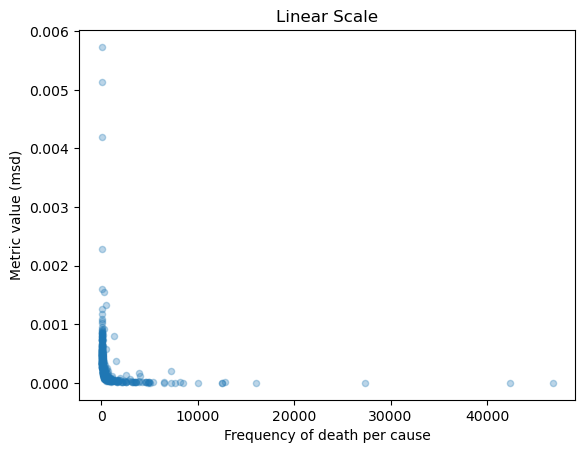

In [164]:
df_deviation.plot(x='freq_cause', y='deviation', kind='scatter',
                  title='Linear Scale',
                  marker='o', alpha=0.3,
                  xlabel='Frequency of death per cause', ylabel='Metric value (msd)');

We can have a better picture in [log-log](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) scale.

In [165]:
df_log_dev = pd.concat([df_deviation, 
                        df_deviation[['freq_cause', 'deviation']].map(np.log10).rename(columns={'freq_cause':'log_freq_cause', 'deviation':'log_deviation'})],
                        axis=1)
df_log_dev

,cod,deviation,freq_cause,log_freq_cause,log_deviation
0,A01,0.000892,52,1.716003,-3.049666
1,A02,0.000738,62,1.792392,-3.131929
2,A04,0.000198,139,2.143015,-3.702724
3,A06,0.000440,84,1.924279,-3.356980
4,A09,0.000028,3056,3.485153,-4.546885
...,...,...,...,...,...
442,Y33,0.000685,55,1.740363,-3.164076
443,Y34,0.000061,749,2.874482,-4.217698
444,Y57,0.000319,107,2.029384,-3.496135
445,Y83,0.000200,171,2.232996,-3.698319


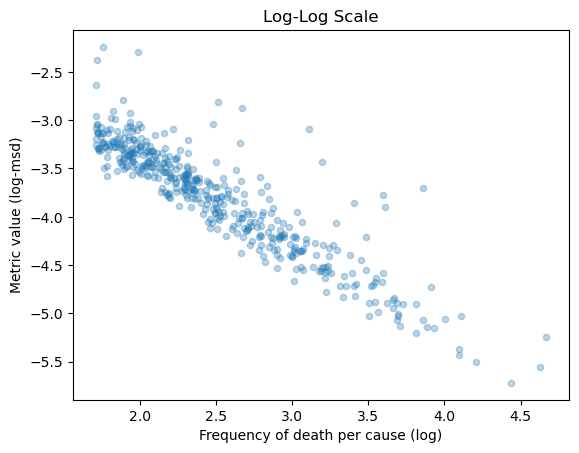

In [166]:
df_log_dev.plot(x='log_freq_cause', y='log_deviation', kind='scatter',
                  title='Log-Log Scale',
                  marker='o', alpha=0.3,
                  xlabel='Frequency of death per cause (log)', ylabel='Metric value (log-msd)');

The paper draws a line of best fit from a robust linear model. We'll do something similar, a Bayesian regression with `pymc`. Rest of this notebook is more about modeling then tidy-data principles. Modeling knowledge will be introduced elsewhere, but here the code is provided for completeness.

In [167]:
import pymc as pm
import xarray as xr
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

print(f"Running on PyMC v{pm.__version__}")
az.style.use("arviz-darkgrid")

RANDOM_SEED = 516
rng = np.random.default_rng(RANDOM_SEED)

def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

Running on PyMC v5.8.2


In [168]:
predictor = df_log_dev['log_freq_cause'].values
outcome = df_log_dev['log_deviation'].values
predictor_scaled = standardize(predictor)
outcome_scaled = standardize(outcome)

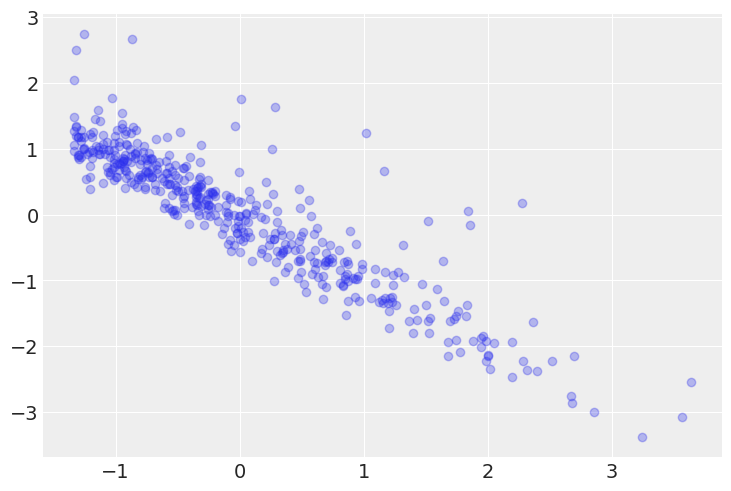

In [169]:
# we'll use standardized scores
plt.scatter(predictor_scaled, outcome_scaled, alpha=0.3);

We'll assume: 
$$
\begin{align*}
D_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \alpha + \beta n
\\
\alpha &\sim \text{Normal}(0,0.5) 
\\
\beta &\sim \text{Normal}(0,0.5)
\\
\sigma &\sim \text{Exponential}(1)
\end{align*}
$$

In [170]:
with pm.Model() as m1:
    alpha = pm.Normal('alpha', 0, 0.5)
    beta = pm.LogNormal('beta', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = pm.Deterministic('mu', alpha - beta * predictor_scaled)
    D = pm.Normal('D', mu=mu, sigma=sigma, observed=outcome_scaled)
    # sample some regression lines based on priors
    idata = pm.sample_prior_predictive(samples=516, random_seed=rng)

prior = idata.prior

Sampling: [D, alpha, beta, sigma]


Graphical depiction of the model

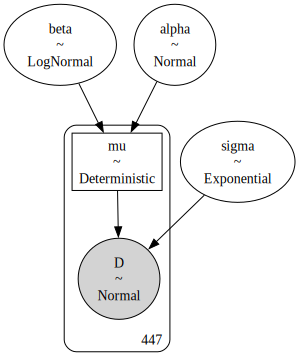

In [171]:
# graphical depiction of the model
pm.model_to_graphviz(m1)

Prior predictive checks.

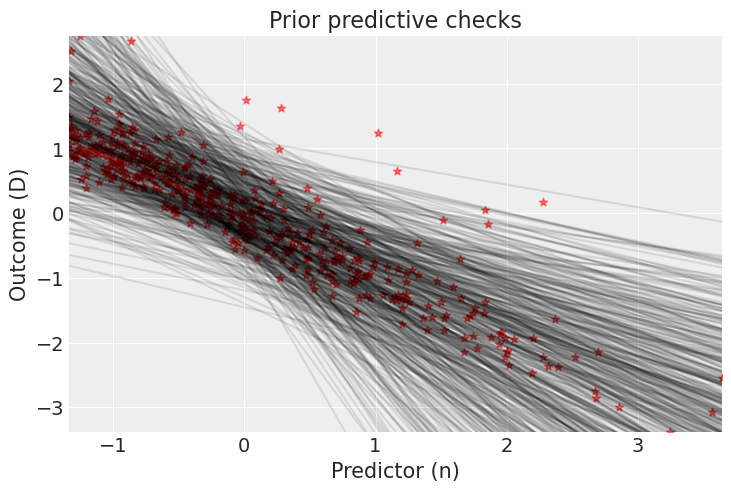

In [172]:
_, ax = plt.subplots()

freq_space = xr.DataArray(np.linspace(predictor_scaled.min()-1,
                                      predictor_scaled.max()+1),
                                      dims=["plot_dim"])
outcome_ppc = prior['alpha'] - prior['beta'] * freq_space
ax.plot(freq_space, outcome_ppc.stack(sample=("chain", "draw")), c="k", alpha=0.1)

ax.scatter(predictor_scaled, outcome_scaled, alpha=0.5, marker='*', color='red');
ax.set_xlim([predictor_scaled.min(), predictor_scaled.max()])
ax.set_ylim([outcome_scaled.min(), outcome_scaled.max()])
ax.set_xlabel("Predictor (n)")
ax.set_ylabel("Outcome (D)")
ax.set_title("Prior predictive checks");

Inference

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 1 seconds.


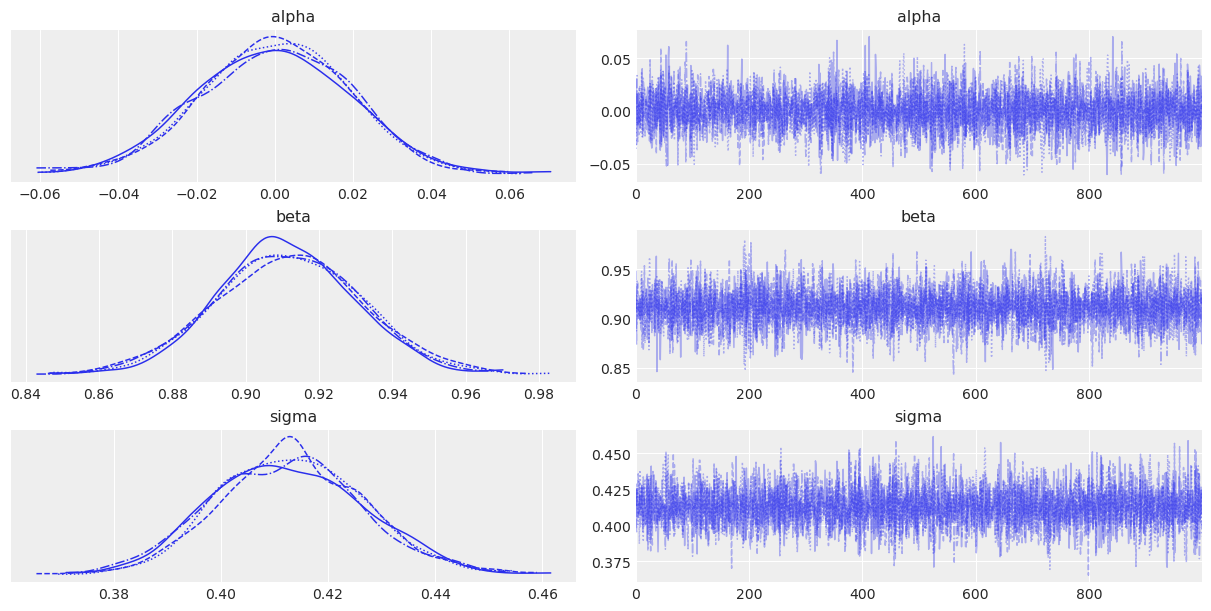

In [173]:
# find posterior
with m1:
    idata.extend(pm.sample(1000, tune = 2000, random_seed=rng))

# plot trace
az.plot_trace(idata, var_names=['alpha', 'beta', 'sigma']);

In [174]:
# now that we've posteriors we can do posterior predictive checks
with m1:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True, random_seed=rng)

Sampling: [D]


In [175]:
# now inference data contains posterior samples of the outcome
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

Posterior predictive

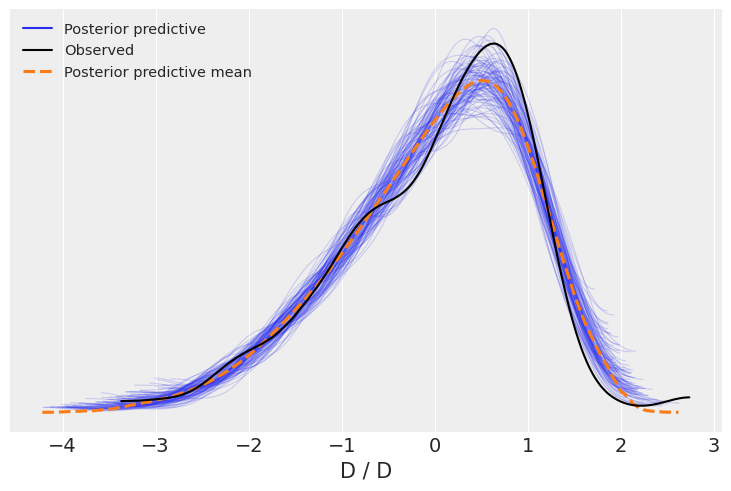

In [176]:
# check if inference can reproduce observations
az.plot_ppc(idata, num_pp_samples=100);

Plot posterior with HDI

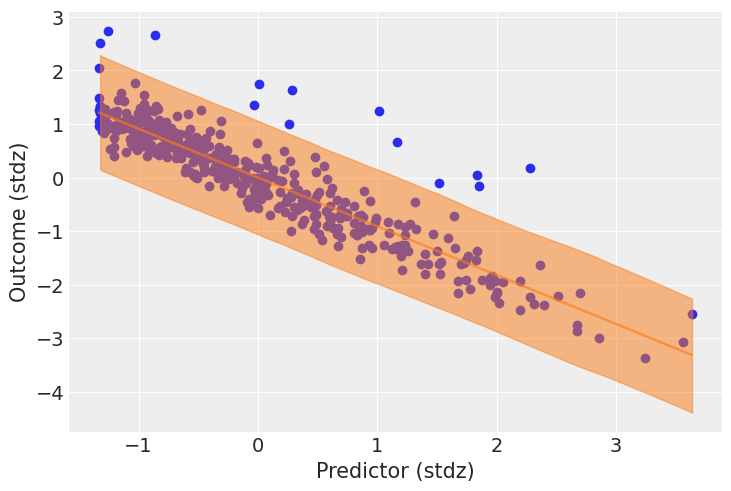

In [177]:
post = idata.posterior
mu_pp = post["alpha"] - post["beta"] * xr.DataArray(predictor_scaled, dims=["obs_id"])

_, ax = plt.subplots()

ax.plot(
    predictor_scaled, mu_pp.mean(("chain", "draw")), label="Mean outcome", color="C1", alpha=0.6
)
ax.scatter(predictor_scaled, idata.observed_data["D"])
az.plot_hdi(predictor_scaled, idata.posterior_predictive["D"], hdi_prob=0.99)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Outcome (stdz)");

Extract interval range for HDI of outcome distribution at each predictor value.

In [178]:
# combine HDI interval values with deviance values
df_final = pd.concat([pd.DataFrame({'cause': df_log_dev['cod'].values,
                                    'n': df_log_dev['freq_cause'].values,
                                    'deviance': outcome_scaled}),
                      az.hdi(idata.posterior_predictive["D"], hdi_prob=0.99).to_dataframe().reset_index().pivot(index='D_dim_2',
                                                                                                                columns='hdi',
                                                                                                                values='D').reset_index()[['higher','lower']]],
                     axis=1)

In [179]:
df_final['outlier'] = df_final.apply(lambda x: not(x['lower'] < x['deviance'] < x['higher']), axis=1)
df_final['is_large'] = df_final['outlier'] & (df_final['n'] > 350)
df_final

,cause,n,deviance,higher,lower,outlier,is_large
0,A01,52,1.320985,2.298362,0.144632,False,False
1,A02,62,1.176255,2.165836,-0.011260,False,False
2,A04,139,0.172017,1.632543,-0.504872,False,False
3,A06,84,0.780308,2.070292,-0.077531,False,False
4,A09,3056,-1.313171,-0.481657,-2.581671,False,False
...,...,...,...,...,...,...,...
442,Y33,55,1.119696,2.243405,0.063777,False,False
443,Y34,749,-0.734011,0.491680,-1.648952,False,False
444,Y57,107,0.535483,1.830928,-0.330786,False,False
445,Y83,171,0.179768,1.498636,-0.619323,False,False


Add long names for causes, and time course vectors.

In [180]:
df_final['cause_long'] = df_final.apply(lambda x: df_cause_ids[df_cause_ids['code'] == x['cause']]['disease'].values[0], axis=1)
df_final['plot_vec'] = df_final.apply(lambda x: df_representative[df_representative['cod']==x['cause']].groupby('hod').first()['prop_cause_hour'].values, axis=1)
df_final['hours_vec'] = df_final.apply(lambda x: df_representative[df_representative['cod']==x['cause']].groupby('hod').first().reset_index()['hod'].values, axis=1)

In [181]:
df_plot = df_final[df_final['outlier']]
df_plot

,cause,n,deviance,higher,lower,outlier,is_large,cause_long,plot_vec,hours_vec
367,R95,323,1.747254,1.099021,-1.022115,True,False,Sudden infant death syndrome,"[0.04024767801857585, 0.06501547987616099, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
374,V09,3956,0.047724,-0.621697,-2.755130,True,True,Pedestrian injured in other and unspecified tr...,"[0.03741152679474216, 0.03564206268958544, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
387,V79,52,2.503732,2.240871,0.047265,True,False,Bus occupant injured in other and unspecified ...,"[0.038461538461538464, 0.28846153846153844, 0....","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
389,V87,2545,-0.105515,-0.253160,-2.384513,True,True,Traffic accident of specified type but victim'...,"[0.04833005893909627, 0.044400785854616896, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
390,V89,4061,-0.163799,-0.630294,-2.764604,True,True,"Motor- or nonmotor-vehicle accident, type of v...","[0.04949519822703768, 0.042107855208076826, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
391,V95,57,2.742383,2.217859,0.054932,True,False,Accident to powered aircraft causing injury to...,"[0.017543859649122806, 0.017543859649122806, 0...","[9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 22, 23]"
401,W69,469,1.628957,0.770557,-1.337928,True,True,Drowning and submersion while in natural water,"[0.014925373134328358, 0.021321961620469083, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
403,W73,303,1.347529,1.039882,-0.990212,True,False,Other specified drowning and submersion,"[0.0231023102310231, 0.0033003300330033004, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
404,W74,1283,1.238641,0.100511,-1.985436,True,True,Unspecified drowning and submersion,"[0.013250194855806703, 0.01558846453624318, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
411,W87,456,0.998434,0.813199,-1.329358,True,True,Exposure to unspecified electric current,"[0.02412280701754386, 0.013157894736842105, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Reference vector.

In [182]:
reference_vector = df_representative.groupby('hod').first()['prop_hour'].values

In [183]:
def adjust_title(ax):
    title = ax.title
    ax.figure.canvas.draw()
    def _get_t():
        ax_width = ax.get_window_extent().width
        ti_width = title.get_window_extent().width
        return ax_width/ti_width

    while _get_t() <= 1 and title.get_fontsize() > 1:        
        title.set_fontsize(title.get_fontsize()-1)

In [184]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

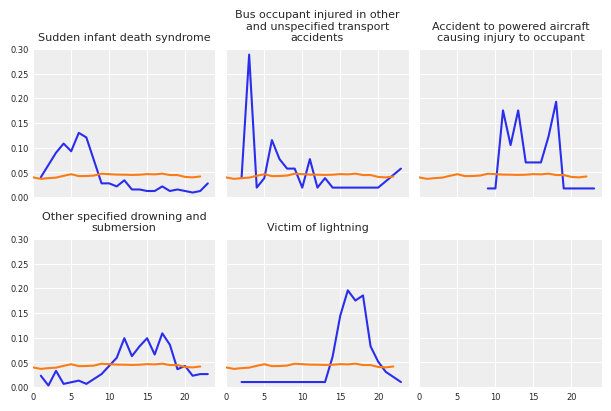

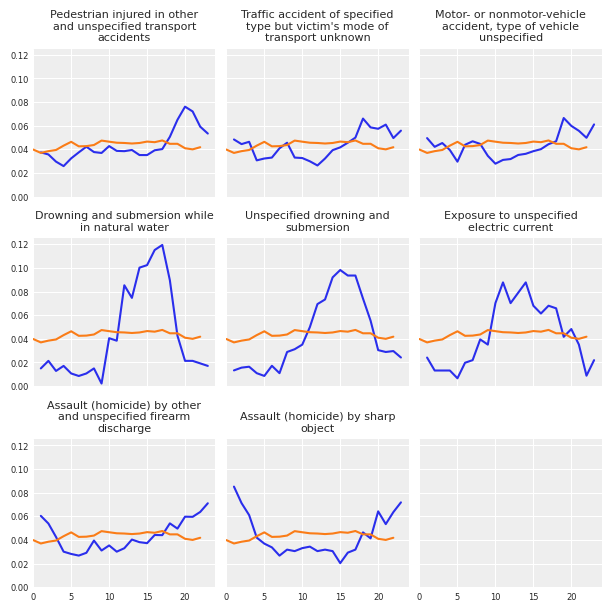

In [185]:
xlim = [0, 24]
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
import textwrap

for g in df_plot.groupby('is_large'):
    if g[0]:
        ylim = [0, 0.125]
        fig, ax = plt.subplots(3, 3, layout='constrained', figsize=(6,6), sharex=True, sharey=True)
        for row_idx in np.arange(len(g[1])):
            curr_ax = ax.flatten()[row_idx]
            curr_ax.plot(g[1]['hours_vec'].iloc[row_idx], g[1]['plot_vec'].iloc[row_idx])
            curr_ax.plot(np.arange(23), reference_vector)
            curr_ax.set_title("\n".join(textwrap.wrap(g[1]['cause_long'].iloc[row_idx], 30)), {'fontsize': 8}, loc='center')
            curr_ax.set_xlim(xlim)
            curr_ax.set_ylim(ylim)
    else:
        ylim = [0, 0.3]
        fig, ax = plt.subplots(2, 3, figsize=(6,4), sharex=True, sharey=True)
        for row_idx in np.arange(len(g[1])):
            curr_ax = ax.flatten()[row_idx]
            curr_ax.plot(g[1]['hours_vec'].iloc[row_idx], g[1]['plot_vec'].iloc[row_idx])
            curr_ax.plot(np.arange(23), reference_vector)
            curr_ax.set_title("\n".join(textwrap.wrap(g[1]['cause_long'].iloc[row_idx], 30)), {'fontsize': 8}, loc='center')
            curr_ax.set_xlim(xlim)
            curr_ax.set_ylim(ylim)